In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import invgamma, norm
from IPython.display import display
from scipy.special import gamma
from scipy.optimize import fsolve

# NIG 분포의 결합 확률밀도함수 정의 (평균과 분산에 대한)
def nig_joint_pdf(mu, sigma2, mu_0, lambda_, alpha, beta):
    # Normal part (mean = mu, variance = sigma2)
    norm_pdf = norm.pdf(mu, mu_0, np.sqrt(sigma2 / lambda_))
    
    # Inverse gamma part (variance = sigma2)
    invgamma_pdf = invgamma.pdf(sigma2, alpha, scale=beta)
    
    return norm_pdf * invgamma_pdf

# CDF에 해당하는 등고선 계산
def calculate_cdf_contour_level(pdf_values, target_cdf):
    # 확률밀도함수 값들을 1D로 변환한 후 정렬
    sorted_pdf = np.sort(pdf_values.flatten())[::-1]
    cumulative_sum = np.cumsum(sorted_pdf)
    cumulative_sum /= cumulative_sum[-1]  # 누적 합을 0~1 사이의 값으로 정규화
    
    # CDF에 해당하는 값을 찾기
    contour_value = sorted_pdf[np.searchsorted(cumulative_sum, target_cdf)]
    return contour_value

# 그래프 업데이트 함수
def update(mu_0, lambda_, alpha, beta, target_cdf):
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 20, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    
    # 그래프 그리기
    plt.figure(figsize=(8, 6))
    plt.contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    plt.colorbar(label='Density')




    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(beta) *np.sqrt(lambda_) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=beta) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 0.1
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 20
    large_y = fsolve(equation, initial_guess)[0]


    y = np.exp((np.log(np.sqrt(lambda_)*beta**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/lambda_*np.log(c/invgamma.pdf(y,alpha,scale=beta)*np.sqrt(2*np.pi*y)/np.sqrt(lambda_)))
    plt.axvline(x=mu_0+x, color='y', linestyle='--')
    plt.axvline(x=mu_0-x, color='y', linestyle='--')
    
    # plt.axhline(y=1.8042617241070633, color='g', linestyle='--')
    plt.axhline(y=small_y, color='y', linestyle='--')
    plt.axhline(y=large_y, color='y', linestyle='--')


    
    # CDF에 해당하는 등고선 그리기
    plt.contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
    plt.title(f'NIG PDF with μ₀={mu_0:.4f}, λ={lambda_:.4f}, α={alpha:.4f}, β={beta:.4f} and CDF = {target_cdf:.4f}')
    plt.xlabel('Mean (μ)')
    plt.ylabel('Variance (σ²)')
    plt.grid(True)
    plt.show()

# 파라미터 조절 위젯 생성
mu_0_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='μ₀ (prior mean)')
lambda_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='λ (precision)')
alpha_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='α (shape)')
beta_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='β (scale)')
cdf_slider = widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description='Target CDF')

# 대화형 위젯으로 출력
ui = widgets.VBox([mu_0_slider, lambda_slider, alpha_slider, beta_slider, cdf_slider])
out = widgets.interactive_output(update, {
    'mu_0': mu_0_slider, 
    'lambda_': lambda_slider, 
    'alpha': alpha_slider, 
    'beta': beta_slider, 
    'target_cdf': cdf_slider
})

display(ui, out)


Output()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import invgamma, norm
from IPython.display import display

# NIG 분포의 결합 확률밀도함수 정의 (평균과 분산에 대한)
def nig_joint_pdf(mu, sigma2, mu_0, lambda_, alpha, beta):
    # Normal part (mean = mu, variance = sigma2)
    norm_pdf = norm.pdf(mu, mu_0, np.sqrt(sigma2 / lambda_))
    
    # Inverse gamma part (variance = sigma2)
    invgamma_pdf = invgamma.pdf(sigma2, alpha, scale=beta)
    
    return norm_pdf * invgamma_pdf

# CDF에 해당하는 등고선 계산
def calculate_cdf_contour_level(pdf_values, target_cdf):
    # 확률밀도함수 값들을 1D로 변환한 후 정렬
    sorted_pdf = np.sort(pdf_values.flatten())[::-1]
    cumulative_sum = np.cumsum(sorted_pdf)
    cumulative_sum /= cumulative_sum[-1]  # 누적 합을 0~1 사이의 값으로 정규화
    
    # CDF에 해당하는 값을 찾기
    contour_value = sorted_pdf[np.searchsorted(cumulative_sum, target_cdf)]
    return contour_value

# 그래프 업데이트 함수
def update(mu_0, lambda_, alpha, beta, target_cdf):
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 20, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    
    # 그래프 그리기
    fig, ax = plt.subplots(1,2, figsize=(16,6))#plt.figure(figsize=(8, 6))


    # First Figure
    ax[0].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(beta) *np.sqrt(lambda_) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=beta) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 0.1
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 20
    large_y = fsolve(equation, initial_guess)[0]

    y = np.exp((np.log(np.sqrt(lambda_)*beta**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/lambda_*np.log(c/invgamma.pdf(y,alpha,scale=beta)*np.sqrt(2*np.pi*y)/np.sqrt(lambda_)))

    original_x, original_y = mu_0+x,large_y
    
    ax[0].axvline(x=mu_0+x, color='y', linestyle='--')
    ax[0].axvline(x=mu_0-x, color='y', linestyle='--')
    
    ax[0].axhline(y=small_y, color='y', linestyle='--')
    ax[0].axhline(y=large_y, color='y', linestyle='--')


    ax[0].scatter(mu_0+x,large_y, color='r')


    
    # CDF에 해당하는 등고선 그리기
    ax[0].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
    ax[0].set_title(f'NIG PDF with μ₀={mu_0:.4f}, λ={lambda_:.4f}, α={alpha:.4f}, β={beta:.4f} and CDF = {target_cdf:.4f}')
    ax[0].set_xlabel('Mean (μ)')
    ax[0].set_ylabel('Variance (σ²)')
    ax[0].grid(True)


    # Second Figure
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 20, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    ax[1].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    # CDF에 해당하는 등고선 그리기
    ax[1].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)

    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(1) *np.sqrt(1) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=1) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 0.1
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 5
    large_y = fsolve(equation, initial_guess)[0]

    y = np.exp((np.log(np.sqrt(1)*1**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/1*np.log(c/invgamma.pdf(y,alpha,scale=1)*np.sqrt(2*np.pi*y)/np.sqrt(1)))
    ax[1].axvline(x=x, color='y', linestyle='--')
    ax[1].axvline(x=-x, color='y', linestyle='--')
    
    ax[1].axhline(y=small_y, color='y', linestyle='--')
    ax[1].axhline(y=large_y, color='y', linestyle='--')


    st_x, st_y = (original_x - mu_0)/np.sqrt(lambda_/beta), original_y/beta
    ax[1].scatter(st_x, st_y, color='r')

    second_x, second_y = x, large_y
    ax[1].scatter(second_x, second_y, color='g')
    converted_x, converted_y = second_x * np.sqrt(lambda_/beta)+mu_0, second_y * beta

    ax[0].scatter(converted_x, converted_y, color='g')
    
    plt.show()

# 파라미터 조절 위젯 생성
mu_0_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='μ₀ (prior mean)')
lambda_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='λ (precision)')
alpha_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='α (shape)')
beta_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='β (scale)')
cdf_slider = widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description='Target CDF')

# 대화형 위젯으로 출력
ui = widgets.VBox([mu_0_slider, lambda_slider, alpha_slider, beta_slider, cdf_slider])
out = widgets.interactive_output(update, {
    'mu_0': mu_0_slider, 
    'lambda_': lambda_slider, 
    'alpha': alpha_slider, 
    'beta': beta_slider, 
    'target_cdf': cdf_slider
})

display(ui, out)


Output()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import invgamma, norm
from IPython.display import display
from matplotlib.collections import LineCollection
import copy

dmu = (5+5)/100
dsigma2 = (20-0.01)/100
dA = dmu * dsigma2

# NIG 분포의 결합 확률밀도함수 정의 (평균과 분산에 대한)
def nig_joint_pdf(mu, sigma2, mu_0, lambda_, alpha, beta):
    # Normal part (mean = mu, variance = sigma2)
    norm_pdf = norm.pdf(mu, mu_0, np.sqrt(sigma2 / lambda_))
    
    # Inverse gamma part (variance = sigma2)
    invgamma_pdf = invgamma.pdf(sigma2, alpha, scale=beta)
    
    return norm_pdf * invgamma_pdf

# CDF에 해당하는 등고선 계산
def calculate_cdf_contour_level(pdf_values, target_cdf):
    # 확률밀도함수 값들을 1D로 변환한 후 정렬
    sorted_pdf = np.sort(pdf_values.flatten())[::-1]
    cumulative_sum = np.cumsum(sorted_pdf)
    cumulative_sum *= dA
    # cumulative_sum /= cumulative_sum[-1]  # 누적 합을 0~1 사이의 값으로 정규화
    
    # CDF에 해당하는 값을 찾기
    contour_value = sorted_pdf[np.searchsorted(cumulative_sum, target_cdf)]
    return contour_value

# 그래프 업데이트 함수
def update(mu_0, lambda_, alpha, beta, target_cdf):
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 20, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    
    # 그래프 그리기
    fig, ax = plt.subplots(1,2, figsize=(16,6))#plt.figure(figsize=(8, 6))


    # First Figure
    ax[0].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(beta) *np.sqrt(lambda_) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=beta) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = beta/(alpha+1)/10
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = beta/(alpha-1)
    large_y = fsolve(equation, initial_guess)[0]

    y = np.exp((np.log(np.sqrt(lambda_)*beta**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/lambda_*np.log(c/invgamma.pdf(y,alpha,scale=beta)*np.sqrt(2*np.pi*y)/np.sqrt(lambda_)))

    original_x, original_y = mu_0+x,large_y
    edge_x, edge_y = mu_0+x,y
    
    ax[0].axvline(x=mu_0+x, color='y', linestyle='--')
    ax[0].axvline(x=mu_0-x, color='y', linestyle='--')
    
    ax[0].axhline(y=small_y, color='y', linestyle='--')
    ax[0].axhline(y=large_y, color='y', linestyle='--')


    ax[0].scatter(mu_0+x,large_y, color='r')

    ax[0].scatter(edge_x, edge_y, color='y', marker='x')

    
    # CDF에 해당하는 등고선 그리기
    ax[0].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
    ax[0].set_title(f'NIG PDF with μ₀={mu_0:.4f}, λ={lambda_:.4f}, α={alpha:.4f}, β={beta:.4f} and CDF = {target_cdf:.4f}')
    ax[0].set_xlabel('Mean (μ)')
    ax[0].set_ylabel('Variance (σ²)')
    ax[0].grid(True)


    # Second Figure
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 20, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    ax[1].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    # CDF에 해당하는 등고선 그리기
    ctr = ax[1].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
    
    segments = copy.deepcopy(ctr.allsegs)
    segments = [transpose(segments[0][0], mu_0, lambda_, alpha, beta)]
    line_collection = LineCollection(segments, colors='b')
    ax[0].add_collection(line_collection)
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(1) *np.sqrt(1) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=1) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha+1)/10
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha-1)
    large_y = fsolve(equation, initial_guess)[0]

    y = np.exp((np.log(np.sqrt(1)*1**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/1*np.log(c/invgamma.pdf(y,alpha,scale=1)*np.sqrt(2*np.pi*y)/np.sqrt(1)))
    ax[1].axvline(x=x, color='y', linestyle='--')
    ax[1].axvline(x=-x, color='y', linestyle='--')
    
    ax[1].axhline(y=small_y, color='y', linestyle='--')
    ax[1].axhline(y=large_y, color='y', linestyle='--')


    st_x, st_y = (original_x - mu_0)/np.sqrt(lambda_/beta), original_y/beta
    ax[1].scatter(st_x, st_y, color='r')

    second_x, second_y = x, large_y
    ax[1].scatter(second_x, second_y, color='g')
    converted_x, converted_y = second_x * np.sqrt(lambda_/beta)+mu_0, second_y * beta

    ax[0].scatter(converted_x, converted_y, color='g')

    ax[1].scatter((edge_x - mu_0)/np.sqrt(lambda_/beta), edge_y/beta, marker='x', color='y')

    
    plt.show()

# 파라미터 조절 위젯 생성
mu_0_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='μ₀ (prior mean)')
lambda_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='λ (precision)')
alpha_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='α (shape)')
beta_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='β (scale)')
cdf_slider = widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description='Target CDF')

# 대화형 위젯으로 출력
ui = widgets.VBox([mu_0_slider, lambda_slider, alpha_slider, beta_slider, cdf_slider])
out = widgets.interactive_output(update, {
    'mu_0': mu_0_slider, 
    'lambda_': lambda_slider, 
    'alpha': alpha_slider, 
    'beta': beta_slider, 
    'target_cdf': cdf_slider
})

display(ui, out)


Output()

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import invgamma, norm
from IPython.display import display
from matplotlib.collections import LineCollection
import copy

dmu = (5+5)/100
dsigma2 = (20-0.01)/100
dA = dmu * dsigma2

# NIG 분포의 결합 확률밀도함수 정의 (평균과 분산에 대한)
def nig_joint_pdf(mu, sigma2, mu_0, lambda_, alpha, beta):
    # Normal part (mean = mu, variance = sigma2)
    norm_pdf = norm.pdf(mu, mu_0, np.sqrt(sigma2 / lambda_))
    
    # Inverse gamma part (variance = sigma2)
    invgamma_pdf = invgamma.pdf(sigma2, alpha, scale=beta)
    
    return norm_pdf * invgamma_pdf

# CDF에 해당하는 등고선 계산
def calculate_cdf_contour_level(pdf_values, target_cdf):
    # 확률밀도함수 값들을 1D로 변환한 후 정렬
    sorted_pdf = np.sort(pdf_values.flatten())[::-1]
    cumulative_sum = np.cumsum(sorted_pdf)
    cumulative_sum *= dA
    # cumulative_sum /= cumulative_sum[-1]  # 누적 합을 0~1 사이의 값으로 정규화
    
    # CDF에 해당하는 값을 찾기
    contour_value = sorted_pdf[np.searchsorted(cumulative_sum, target_cdf)]
    return contour_value

# 그래프 업데이트 함수
def update(mu_0, lambda_, alpha, beta, target_cdf):
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 5, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    
    # 그래프 그리기
    fig, ax = plt.subplots(1,2, figsize=(16,6))#plt.figure(figsize=(8, 6))


    # First Figure
    ax[0].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(beta) *np.sqrt(lambda_) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=beta) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = beta/(alpha+1)/10
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = beta/(alpha-1)
    large_y = fsolve(equation, initial_guess)[0]

    y = np.exp((np.log(np.sqrt(lambda_)*beta**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/lambda_*np.log(c/invgamma.pdf(y,alpha,scale=beta)*np.sqrt(2*np.pi*y)/np.sqrt(lambda_)))

    original_x, original_y = mu_0+x,large_y
    edge_x, edge_y = mu_0+x,y
    
    ax[0].axvline(x=mu_0+x, color='y', linestyle='--')
    ax[0].axvline(x=mu_0-x, color='y', linestyle='--')
    
    ax[0].axhline(y=small_y, color='y', linestyle='--')
    ax[0].axhline(y=large_y, color='y', linestyle='--')


    ax[0].scatter(mu_0+x,large_y, color='r')

    ax[0].scatter(edge_x, edge_y, color='y', marker='x')

    
    # CDF에 해당하는 등고선 그리기
    ctr = ax[0].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
        # get contour area 
    contour_path = ctr.collections[0].get_paths()[0]
    mask = np.array([contour_path.contains_point((xi, yi)) for xi, yi in zip(mu_grid.flatten(), sigma2_grid.flatten())])
    masked_values = pdf_values.flatten()[mask]
    print("original sum: ",np.sum(masked_values) * dA)

    
    ax[0].set_title(f'NIG PDF with μ₀={mu_0:.4f}, λ={lambda_:.4f}, α={alpha:.4f}, β={beta:.4f} and CDF = {target_cdf:.4f}')
    ax[0].set_xlabel('Mean (μ)')
    ax[0].set_ylabel('Variance (σ²)')
    ax[0].grid(True)


    # Second Figure
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 5, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    std_pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(std_pdf_values, target_cdf)
    ax[1].contourf(mu_grid, sigma2_grid, std_pdf_values, levels=np.linspace(0, std_pdf_values.max(), 100), cmap='viridis')
    # CDF에 해당하는 등고선 그리기
    ctr = ax[1].contour(mu_grid, sigma2_grid, std_pdf_values, levels=[contour_level], colors='red', linewidths=2)

    # get contour area 
    contour_path = ctr.collections[0].get_paths()[0]
    mask = np.array([contour_path.contains_point((xi, yi)) for xi, yi in zip(mu_grid.flatten(), sigma2_grid.flatten())])
    masked_values = std_pdf_values.flatten()[mask]
    print("std sum: ",np.sum(masked_values) * dA)

    
    segments = copy.deepcopy(ctr.allsegs)
    segments = [transpose(segments[0][0], mu_0, lambda_, alpha, beta)]
    line_collection = LineCollection(segments, colors='b')
    ax[0].add_collection(line_collection)


        # get contour area 
    contour_path = line_collection.get_paths()[0]
    mask = np.array([contour_path.contains_point((xi, yi)) for xi, yi in zip(mu_grid.flatten(), sigma2_grid.flatten())])
    masked_values = pdf_values.flatten()[mask]
    print("reverse sum: ",np.sum(masked_values) * dA)
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(1) *np.sqrt(1) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=1) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha+1)/10
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha-1)
    large_y = fsolve(equation, initial_guess)[0]

    y = np.exp((np.log(np.sqrt(1)*1**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/1*np.log(c/invgamma.pdf(y,alpha,scale=1)*np.sqrt(2*np.pi*y)/np.sqrt(1)))
    ax[1].axvline(x=x, color='y', linestyle='--')
    ax[1].axvline(x=-x, color='y', linestyle='--')
    
    ax[1].axhline(y=small_y, color='y', linestyle='--')
    ax[1].axhline(y=large_y, color='y', linestyle='--')


    st_x, st_y = (original_x - mu_0)*np.sqrt(lambda_/beta), original_y/beta
    ax[1].scatter(st_x, st_y, color='r')

    second_x, second_y = x, large_y
    ax[1].scatter(second_x, second_y, color='g')
    converted_x, converted_y = second_x / np.sqrt(lambda_/beta)+mu_0, second_y * beta

    ax[0].scatter(converted_x, converted_y, color='y')

    ax[1].scatter((edge_x - mu_0)*np.sqrt(lambda_/beta), edge_y/beta, marker='x', color='y')

    
    plt.show()

# 파라미터 조절 위젯 생성
mu_0_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='μ₀ (prior mean)')
lambda_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='λ (precision)')
alpha_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='α (shape)')
beta_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='β (scale)')
cdf_slider = widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description='Target CDF')

# 대화형 위젯으로 출력
ui = widgets.VBox([mu_0_slider, lambda_slider, alpha_slider, beta_slider, cdf_slider])
out = widgets.interactive_output(update, {
    'mu_0': mu_0_slider, 
    'lambda_': lambda_slider, 
    'alpha': alpha_slider, 
    'beta': beta_slider, 
    'target_cdf': cdf_slider
})

display(ui, out)


Output()

pdf value:  0.0036442331928330093
pdf value:  3.6645032006292445e-05


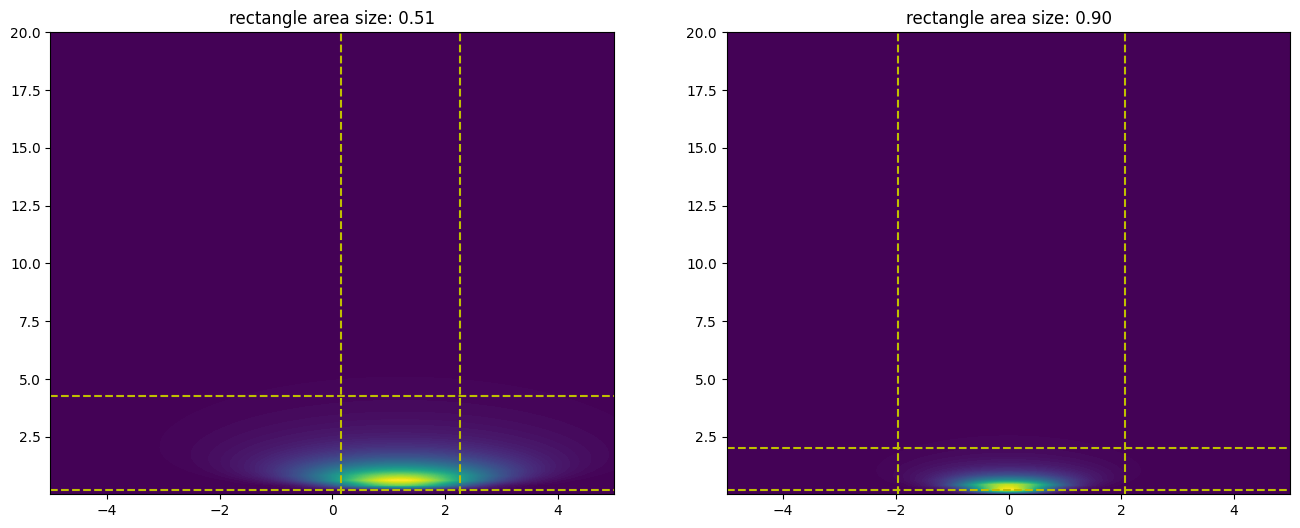

In [128]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
mu_0 = 1.2
lambda_ = 0.6
alpha = 2.1
beta = 2.1
# Second Figure
mu_s, mu_l, mu_n = -5, 5, 100
sigma2_s, sigma2_l, sigma2_n = 0.01, 20, 100
mu_values = np.linspace(mu_s, mu_l, mu_n)
sigma2_values = np.linspace(sigma2_s, sigma2_l, sigma2_n)
dmu = (mu_l-mu_s)/mu_n
dsigma2 = (sigma2_l-sigma2_s)/sigma2_n
dA = dmu * dsigma2
# 그리드를 만들어 결합 확률 밀도를 계산
mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)

mu_s_idx, mu_l_idx = np.searchsorted(mu_grid[0], -2*np.sqrt(lambda_/beta)+mu_0), np.searchsorted(mu_grid[0], 2*np.sqrt(lambda_/beta)+mu_0)
sigma2_s_idx, sigma2_l_idx = np.searchsorted(sigma2_grid[:,0], 0.1*beta), np.searchsorted(sigma2_grid[:,0], 2*beta)

print('pdf value: ',pdf_values[sigma2_s_idx, mu_l_idx])

ax[0].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
ax[0].axvline(x=mu_grid[0][mu_s_idx], color='y', linestyle='--')
ax[0].axvline(x=mu_grid[0][mu_l_idx], color='y', linestyle='--')
ax[0].axhline(y=sigma2_grid[:,0][sigma2_s_idx], color='y', linestyle='--')
ax[0].axhline(y=sigma2_grid[:,0][sigma2_l_idx], color='y', linestyle='--')
ax[0].set_title(f"rectangle area size: {pdf_values[sigma2_s_idx:sigma2_l_idx, mu_s_idx:mu_l_idx].sum() * dA:.02f}")

# Second Figure
mu_s, mu_l, mu_n = -5, 5, 100
sigma2_s, sigma2_l, sigma2_n = 0.01, 20, 100
mu_values = np.linspace(mu_s, mu_l, mu_n)
sigma2_values = np.linspace(sigma2_s, sigma2_l, sigma2_n)
dmu = (mu_l-mu_s)/mu_n
dsigma2 = (sigma2_l-sigma2_s)/sigma2_n
dA = dmu * dsigma2
# 그리드를 만들어 결합 확률 밀도를 계산
mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)

mu_s_idx, mu_l_idx = np.searchsorted(mu_grid[0], -2), np.searchsorted(mu_grid[0], 2)
sigma2_s_idx, sigma2_l_idx = np.searchsorted(sigma2_grid[:,0], 0.1), np.searchsorted(sigma2_grid[:,0], 2)

print('pdf value: ',pdf_values[sigma2_s_idx, mu_l_idx])

ax[1].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
ax[1].axvline(x=mu_grid[0][mu_s_idx], color='y', linestyle='--')
ax[1].axvline(x=mu_grid[0][mu_l_idx], color='y', linestyle='--')
ax[1].axhline(y=sigma2_grid[:,0][sigma2_s_idx], color='y', linestyle='--')
ax[1].axhline(y=sigma2_grid[:,0][sigma2_l_idx], color='y', linestyle='--')
ax[1].set_title(f"rectangle area size: {pdf_values[sigma2_s_idx:sigma2_l_idx, mu_s_idx:mu_l_idx].sum() * dA:.02f}")
plt.show()

idx:  (480, 520) (5, 100)
value:  (-1.9519519519519477, 2.052052052052055) (0.11005005005005004, 2.0110010010010004)
pdf value:  5.513032068555214e-07
idx:  (476, 506) (2, 48)
value:  (-2.352352352352348, 0.650650650650654) (0.05002002002002002, 0.9704804804804804)
pdf value:  5.546410289103651e-07
sum:  0.7439709099723546


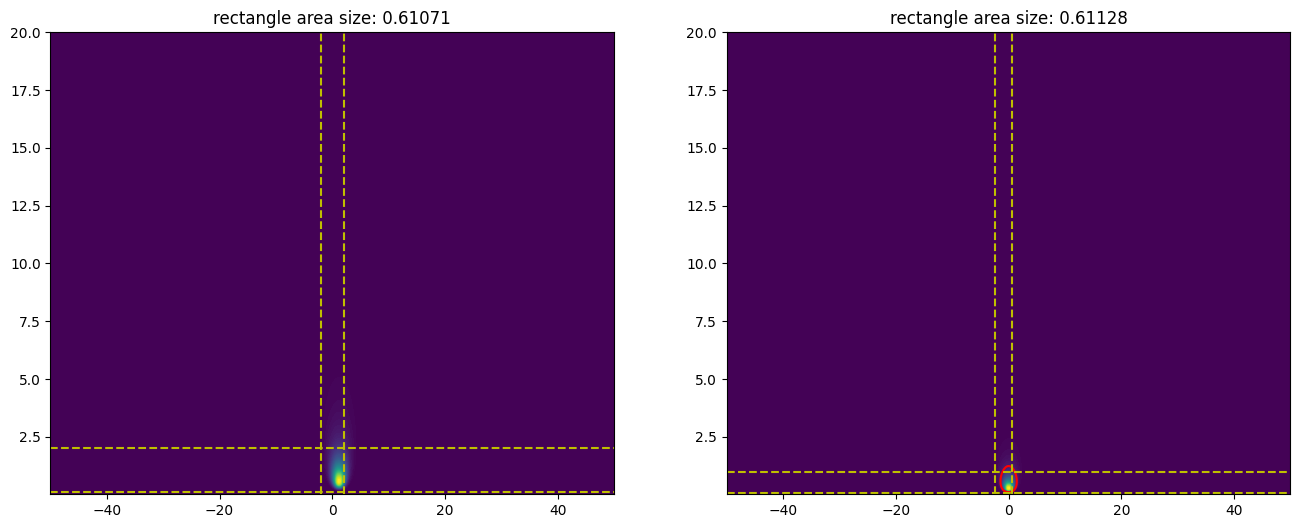

In [233]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
mu_0 = 1.2
lambda_ = 1.2
alpha = 2.1
beta = 2.1
# Second Figure
mu_s, mu_l, mu_n = -50, 50, 1000
sigma2_s, sigma2_l, sigma2_n = 0.01, 20, 1000
mu_values = np.linspace(mu_s, mu_l, mu_n)
sigma2_values = np.linspace(sigma2_s, sigma2_l, sigma2_n)
dmu = (mu_l-mu_s)/mu_n
dsigma2 = (sigma2_l-sigma2_s)/sigma2_n
dA = dmu * dsigma2
# 그리드를 만들어 결합 확률 밀도를 계산
mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)

mu_s_idx, mu_l_idx = np.searchsorted(mu_grid[0], -2), np.searchsorted(mu_grid[0], 2)
sigma2_s_idx, sigma2_l_idx = np.searchsorted(sigma2_grid[:,0], 0.1), np.searchsorted(sigma2_grid[:,0], 2)
print("idx: ",(mu_s_idx, mu_l_idx), (sigma2_s_idx, sigma2_l_idx))
print("value: ",(mu_grid[0][mu_s_idx], mu_grid[0][mu_l_idx]), (sigma2_grid[:,0][sigma2_s_idx], sigma2_grid[:,0][sigma2_l_idx]))
print('pdf value: ',pdf_values[sigma2_s_idx, mu_l_idx])

ax[0].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
ax[0].axvline(x=mu_grid[0][mu_s_idx], color='y', linestyle='--')
ax[0].axvline(x=mu_grid[0][mu_l_idx], color='y', linestyle='--')
ax[0].axhline(y=sigma2_grid[:,0][sigma2_s_idx], color='y', linestyle='--')
ax[0].axhline(y=sigma2_grid[:,0][sigma2_l_idx], color='y', linestyle='--')
ax[0].set_title(f"rectangle area size: {pdf_values[sigma2_s_idx:sigma2_l_idx, mu_s_idx:mu_l_idx].sum() * dA:.05f}")

# Second Figure
mu_s, mu_l, mu_n = -50, 50, 1000
sigma2_s, sigma2_l, sigma2_n = 0.01, 20, 1000
mu_values = np.linspace(mu_s, mu_l, mu_n)
sigma2_values = np.linspace(sigma2_s, sigma2_l, sigma2_n)
dmu = (mu_l-mu_s)/mu_n
dsigma2 = (sigma2_l-sigma2_s)/sigma2_n
dA = dmu * dsigma2
# 그리드를 만들어 결합 확률 밀도를 계산
mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)

mu_s_idx, mu_l_idx = np.searchsorted(mu_grid[0], (-2-mu_0)*np.sqrt(lambda_/beta)), np.searchsorted(mu_grid[0], (2-mu_0)*np.sqrt(lambda_/beta))
sigma2_s_idx, sigma2_l_idx = np.searchsorted(sigma2_grid[:,0], 0.1/beta), np.searchsorted(sigma2_grid[:,0], 2/beta)
print("idx: ",(mu_s_idx, mu_l_idx), (sigma2_s_idx, sigma2_l_idx))
print("value: ",(mu_grid[0][mu_s_idx], mu_grid[0][mu_l_idx]), (sigma2_grid[:,0][sigma2_s_idx], sigma2_grid[:,0][sigma2_l_idx]))
print('pdf value: ',pdf_values[sigma2_s_idx, mu_l_idx])


ax[1].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
contour = ax[1].contour(mu_grid, sigma2_grid, pdf_values, levels=[0.08], colors='r')
contour_path = contour.collections[0].get_paths()[0]
mask = np.array([contour_path.contains_point((xi, yi)) for xi, yi in zip(mu_grid.flatten(), sigma2_grid.flatten())])
masked_values = pdf_values.flatten()[mask]
print("sum: ",np.sum(masked_values) * dA)

ax[1].axvline(x=mu_grid[0][mu_s_idx], color='y', linestyle='--')
ax[1].axvline(x=mu_grid[0][mu_l_idx], color='y', linestyle='--')
ax[1].axhline(y=sigma2_grid[:,0][sigma2_s_idx], color='y', linestyle='--')
ax[1].axhline(y=sigma2_grid[:,0][sigma2_l_idx], color='y', linestyle='--')
ax[1].set_title(f"rectangle area size: {pdf_values[sigma2_s_idx:sigma2_l_idx, mu_s_idx:mu_l_idx].sum() * dA:.05f}")
plt.show()

# mu 쪽은 표준화 완료! 이제 sigma2 쪽을 해야하는데...

In [170]:
mu_grid[0][5200], sigma2_grid[:,0][5]

(2.005200520052007, 0.11005005005005004)

In [211]:
norm.cdf(2.005200520052007, mu_0, np.sqrt(0.11005005005005004/lambda_)), norm.cdf((2.005200520052007-mu_0)*np.sqrt(lambda_), 0, np.sqrt(0.11005005005005004))

(0.9960800136187834, 0.9960800136187834)

In [200]:
print(nig_joint_pdf(2.005200520052007, 0.11005005005005004, mu_0, lambda_, alpha, beta), nig_joint_pdf((2.005200520052007-mu_0)*lambda_, 0.11005005005005004, 0, 1, alpha, beta))

# Normal part (mean = mu, variance = sigma2)
norm_pdf = norm.pdf((2.005200520052007-mu_0)/np.sqrt(0.11005005005005004 / lambda_), 0, 1)

# Inverse gamma part (variance = sigma2)
invgamma_pdf = invgamma.pdf(0.11005005005005004, alpha, scale=beta)
print(norm_pdf * invgamma_pdf)

8.418564729491753e-07 3.789793955417077e-07
2.5494268457627026e-07


In [173]:
pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)
print(pdf_values[5, 5200])
print(mu_
print(nig_joint_pdf(mu_grid[0][5200], sigma2_grid[:,0][5], mu_0, lambda_, alpha, beta))

8.418564729491753e-07
8.418564729491753e-07


In [245]:
-0.656/np.sqrt(lambda_/beta)+mu_0, 0.186*beta#, lambda_, alpha, beta

(0.3321935699708142, 0.3906)

In [246]:
segment = np.array([[-0.65656566,  0.18632687],
       [-0.55555556,  0.14208743],
       [-0.45454545,  0.11382789],
       [-0.35353535,  0.09563987],
       [-0.25252525,  0.08412207],
       [-0.15151515,  0.07731758],
       [-0.05050505,  0.0741533 ],
       [ 0.05050505,  0.0741533 ],
       [ 0.15151515,  0.07731758],
       [ 0.25252525,  0.08412207],
       [ 0.35353535,  0.09563987],
       [ 0.45454545,  0.11382789],
       [ 0.55555556,  0.14208743],
       [ 0.65656566,  0.18632687],
       [ 0.70131321,  0.21191919],
       [ 0.75757576,  0.26432564],
       [ 0.85858586,  0.34137364],
       [ 0.95959596,  0.41383838],
       [ 0.85858586,  0.56610518],
       [ 0.79576664,  0.61575758],
       [ 0.75757576,  0.64076119],
       [ 0.65656566,  0.69279602],
       [ 0.55555556,  0.72949127],
       [ 0.45454545,  0.75543884],
       [ 0.35353535,  0.77358982],
       [ 0.25252525,  0.78585244],
       [ 0.15151515,  0.79343849],
       [ 0.05050505,  0.79706479],
       [-0.05050505,  0.79706479],
       [-0.15151515,  0.79343849],
       [-0.25252525,  0.78585244],
       [-0.35353535,  0.77358982],
       [-0.45454545,  0.75543884],
       [-0.55555556,  0.72949127],
       [-0.65656566,  0.69279602],
       [-0.75757576,  0.64076119],
       [-0.79576664,  0.61575758],
       [-0.85858586,  0.56610518],
       [-0.95959596,  0.41383838],
       [-0.85858586,  0.34137364],
       [-0.75757576,  0.26432564],
       [-0.70131321,  0.21191919],
       [-0.65656566,  0.18632687]])

segment
def transpose(segment, mu_0, lambda_, alpha, beta):
    segment[:,0] = segment[:,0]/np.sqrt(lambda_/beta) + mu_0
    segment[:,1] = segment[:,1]*beta
    return segment
print(transpose(segment, mu_0, lambda_, alpha, beta))
def rev_transpose(segment, mu_0, lambda_, alpha, bet):
    segment[:,0] = (segment[:,0]-mu_0)/np.sqrt(lambda_/beta)
    segment[:,1] = segment[:,1]/beta
    return segment

[[ 0.33144527  0.39128643]
 [ 0.46506907  0.2983836 ]
 [ 0.59869289  0.23903857]
 [ 0.73231669  0.20084373]
 [ 0.86594049  0.17665635]
 [ 0.9995643   0.16236692]
 [ 1.1331881   0.15572193]
 [ 1.2668119   0.15572193]
 [ 1.4004357   0.16236692]
 [ 1.53405951  0.17665635]
 [ 1.66768331  0.20084373]
 [ 1.80130711  0.23903857]
 [ 1.93493093  0.2983836 ]
 [ 2.06855473  0.39128643]
 [ 2.12775017  0.4450303 ]
 [ 2.20217853  0.55508384]
 [ 2.33580233  0.71688464]
 [ 2.46942613  0.8690606 ]
 [ 2.33580233  1.18882088]
 [ 2.25270032  1.29309092]
 [ 2.20217853  1.3455985 ]
 [ 2.06855473  1.45487164]
 [ 1.93493093  1.53193167]
 [ 1.80130711  1.58642156]
 [ 1.66768331  1.62453862]
 [ 1.53405951  1.65029012]
 [ 1.4004357   1.66622083]
 [ 1.2668119   1.67383606]
 [ 1.1331881   1.67383606]
 [ 0.9995643   1.66622083]
 [ 0.86594049  1.65029012]
 [ 0.73231669  1.62453862]
 [ 0.59869289  1.58642156]
 [ 0.46506907  1.53193167]
 [ 0.33144527  1.45487164]
 [ 0.19782147  1.3455985 ]
 [ 0.14729968  1.29309092]
 

0.33998363132712595
0.33998363132712595


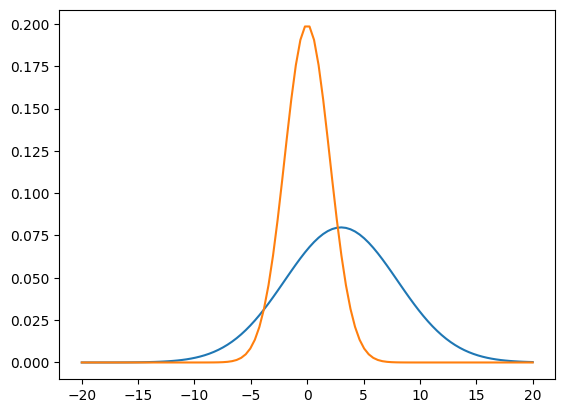

In [113]:
l = np.linspace(-20, 20, 100)
plt.plot(l, norm.pdf(l, 3, 5))
print(norm.cdf(10,3,5) - norm.cdf(4, 3, 5))
plt.plot(l, norm.pdf(l, 0, 2))
print(norm.cdf((10-3)/2.5,0,2) - norm.cdf((4-3)/2.5, 0, 2))

0.5410437201678181
0.5410437201678181


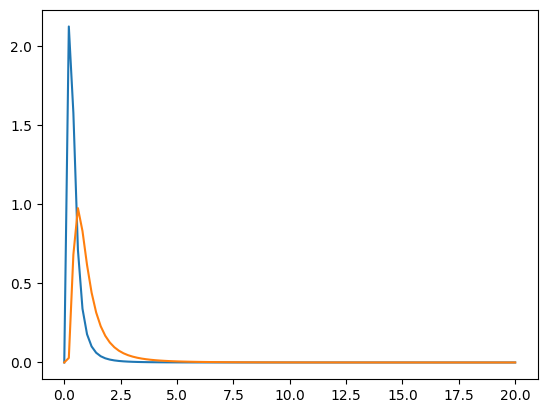

In [103]:
l = np.linspace(0, 20, 100)
plt.plot(l, invgamma.pdf(l, 3, scale=1))
# plt.show()
print(invgamma.cdf(0.4, 3, scale=1)-invgamma.cdf(0.1, 3, scale=1))

plt.plot(l, invgamma.pdf(l, 3, scale=2.4))
print(invgamma.cdf(0.4 * 2.4, 3, scale=2.4)-invgamma.cdf(0.1 * 2.4, 3, scale=2.4))

